In [1]:
from chronos.utils import get_tois, query_gaia_params_of_all_tois
from chronos import Target
from chronos import ClusterCatalog
from tqdm import tqdm
import pandas as pd

cc = ClusterCatalog()
df_mem = cc.query_catalog(return_members=True)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



## query gaiaid of new TOIs

In [2]:
tois = get_tois(clobber=True, verbose=True)
tois.tail(3)

TOIs with TFPWG disposition==FP are removed.

Saved: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv



,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar log(g) (cm/s^2) err,Stellar Radius (R_Sun),Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Sectors,Date TOI Alerted (UTC),Date TOI Edited (UTC),Date Modified,Comments
1606,22843856,1644.01,NaN,3,4,3,3,1,4,4,...,NaN,1.235990,NaN,NaN,NaN,18,2020-01-24 23:33:41,2020-01-28 16:52:09,2020-01-28 10:00:16,V-shaped; seems to be synchronized with variab...
1607,184679932,1645.01,NaN,3,4,3,3,1,4,4,...,0.081649,1.309370,0.058417,NaN,NaN,18,2020-01-24 23:33:41,2020-01-28 16:49:24,2020-01-28 10:00:16,possibly inflated hot Jupiter; synchronized; p...
1608,387527558,1646.01,NaN,3,4,3,3,1,4,4,...,0.004238,0.414101,0.012331,NaN,NaN,18,2020-01-24 23:33:41,2020-01-24 23:33:41,2020-01-25 12:00:17,Period should be 3.62 days which is P/3 of the...


## update pre-querried TOI gaia IDs

In [3]:
tois_gaia = query_gaia_params_of_all_tois(clobber=False, update=True)
tois_gaia.source_id = tois_gaia.source_id.astype(int)

TOIs with TFPWG disposition==FP are removed.

Saved: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv

Querying Gaia DR2 catalog for new TOIs



  0%|          | 0/1266 [00:00<?, ?it/s]

Querying Gaia DR2 catalog for 288.049 63.6571 within 3.0 arcsec.



100%|█████████▉| 1262/1266 [00:10<00:00, 118.14it/s]

Querying Gaia DR2 catalog for 272.264 53.2177 within 3.0 arcsec.

Querying Gaia DR2 catalog for 39.0065 25.5885 within 3.0 arcsec.

Querying Gaia DR2 catalog for 32.2941 40.4019 within 3.0 arcsec.



100%|█████████▉| 1262/1266 [00:30<00:00, 118.14it/s]

Querying Gaia DR2 catalog for 312.327 70.7966 within 3.0 arcsec.



100%|██████████| 1266/1266 [00:36<00:00, 35.14it/s] 


Saved: /home/jp/github/research/project/chronos/chronos/../data/toi_gaia_params.hdf5


In [4]:
tois_gaia.tail(3)

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
TOI,,,,,,,,,,,,,,,,,,,,,
1644.01,1635721458409799680,Gaia DR2 126206278258814336,126206278258814336,162344717,2015.5,39.0065,0.597154,25.5885,0.535354,12.9525,...,0.0027,0.0574,200111,0.652545,0.571108,0.674127,0.34698,0.326783,0.367178,0.00108848
1645.01,1635721458409799680,Gaia DR2 345093337969643392,345093337969643392,1133770013,2015.5,32.2941,0.0347701,40.4019,0.0320872,6.7902,...,0.0393,0.167,200111,1.34182,1.31963,1.35832,2.2477,2.22829,2.2671,0.000586737
1646.01,1635721458409799680,Gaia DR2 2271862641014292864,2271862641014292864,804486046,2015.5,312.327,0.0252764,70.7966,0.029824,12.1471,...,0.0022,0.2311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.62736e-05


In [5]:
idx1 = df_mem.source_id.isin(tois_gaia.source_id)
idx1.sum()

110

In [6]:
df_mem.columns

Index(['source_id', 'clusters', 'reference', 'ext_catalog_name', 'ra', 'dec',
       'pmra', 'pmdec', 'parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'k13_name_match', 'Cluster', 'how_match',
       'not_in_k13', 'comment', 'k13_logt', 'k13_e_logt', 'distance', 'bp_rp',
       'abs_gmag'],
      dtype='object')

In [7]:
idx2 = tois_gaia.source_id.isin(df_mem.source_id)
idx2.sum()

110

In [8]:
idx1 = df_mem.source_id.isin(tois_gaia.source_id)
idx2 = tois_gaia.source_id.isin(df_mem.source_id)

#merge
cols = ['source_id','clusters','reference','Cluster','k13_name_match','k13_logt','distance']
short_list = pd.merge(left=tois_gaia.loc[idx2, 'source_id'].reset_index(),
                      right=df_mem.loc[idx1, cols], 
                     on='source_id')

In [9]:
len(short_list.Cluster.dropna())

13

In [10]:
len(short_list.clusters.dropna())

13

In [11]:
short_list = short_list.loc[short_list.Cluster.dropna().index] 
short_list

,TOI,source_id,clusters,reference,Cluster,k13_name_match,k13_logt,distance
9,580.01,5519619186857962112,"Pozzo_1,nan,Pozzo_1,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",Vel_OB2,Vel_OB2,NaN,349.831608
10,581.01,5525188767305211904,"Trumpler_10,nan,Trumpler_10,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",Trumpler_10,Trumpler_10,7.380,439.535656
21,681.01,5290968085934209152,"NGC_2516,NGC2516,nan,NGC_2516,NGC2516,nan","CantatGaudin_2018,GaiaCollaboration2018_tab1b,...",NGC_2516,NGC_2516,8.475,426.487488
25,837.01,5251470948229949568,"IC2602,IC_2602,IC_2602","GaiaCollaboration2018_tab1a,CantatGaudin_2018,...",IC_2602,IC_2602,8.345,143.076438
27,839.01,5337273743301313536,Loden 306,Dias2014,Loden_306,Loden_306,6.760,1704.358636
28,861.01,5290721997195236480,"NGC_2516,nan,NGC_2516,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",NGC_2516,NGC_2516,8.475,427.475694
32,893.01,3099242937596214272,NGC 2306,Dias2014,NGC_2306,NGC_2306,9.000,1283.226910
75,1336.01,2058880504233056768,Ruprecht 172,Dias2014,Ruprecht_172,Ruprecht_172,9.065,532.174383
90,1497.01,2014335027560174976,"RSG_7,nan,RSG_7,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",RSG_7,NaN,NaN,409.904768
98,1535.01,427614644875238528,"NGC 225,NGC_225","Dias2014,CantatGaudin_2018",NGC_225,NGC_225,8.191,708.443293


In [45]:
toi_short_list = tois[tois.TOI.astype(float).isin(short_list.TOI.astype(float).tolist())]

In [46]:
short_list = pd.merge(left=short_list,
                      right=toi_short_list, 
                     on='TOI')

In [48]:
clobber=True

if clobber:
    short_list.to_csv('tois_in_cluster.csv')
else:
    short_list = pd.read_csv('./tois_in_cluster.csv')

In [49]:
short_list.columns

Index(['TOI', 'source_id', 'clusters', 'reference', 'Cluster',
       'k13_name_match', 'k13_logt', 'distance', 'TIC ID', 'Previous CTOI',
       'Master', 'SG1A', 'SG1B', 'SG2', 'SG3', 'SG4', 'SG5', 'ACWG',
       'TESS Disposition', 'TFOPWG Disposition', 'TESS Mag', 'TESS Mag err',
       'Planet Name', 'Planet Num', 'Source', 'RA', 'Dec', 'PM RA (mas/yr)',
       'PM RA err (mas/yr)', 'PM Dec (mas/yr)', 'PM Dec err (mas/yr)',
       'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)', 'Period (days) err',
       'Duration (hours)', 'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance (pc) err',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar log(g) (cm/s^2) err',
       'Stellar Radius (R_Sun)

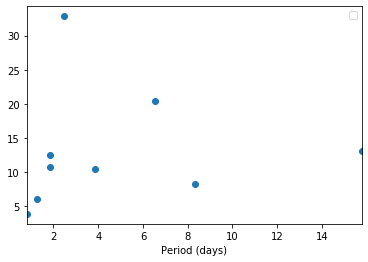

In [50]:
short_list.plot(x='Period (days)', y='Planet Radius (R_Earth)', marker='o', ls='', label='__no_legend__')

In [51]:
short_list[['TOI','Period (days)','Planet Radius (R_Earth)']].sort_values(by='Period (days)')

,TOI,Period (days),Planet Radius (R_Earth)
8,1497.01,0.815800,3.866670
10,1571.01,1.242700,6.052710
1,581.01,1.388460,NaN
0,580.01,1.549590,NaN
11,1585.01,1.836410,10.739900
12,1641.01,1.864989,12.538129
4,839.01,2.485338,32.826550
7,1336.01,3.862830,10.456300
6,893.01,5.590710,NaN
9,1535.01,6.534270,20.406099


In [91]:
cluster_planets = {}

#idx = tois_gaia.source_id.astype(int).isin(df_mem.source_id)

for toi in tqdm(short_list.TOI.tolist()): 
    gaiaid = tois_gaia.loc[toi,'source_id']
    t = Target(gaiaDR2id=gaiaid)
    idx = df_mem.source_id.isin([t.gaiaid])
    if idx.sum()>0:
        #find nearest cluster
        try:
            cluster = t.find_nearest_cluster_member(match_id=True)
            cluster_planets[toi]=(t.gaiaid, cluster)
        except Exception as e:
            print(e)


  0%|          | 0/13 [00:00<?, ?it/s]

Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




  8%|▊         | 1/13 [00:06<01:14,  6.18s/it]

Target is in Vel_OB2 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 15%|█▌        | 2/13 [00:13<01:10,  6.41s/it]

Target is in Trumpler_10 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 23%|██▎       | 3/13 [00:19<01:03,  6.31s/it]

Target is in NGC_2516 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 31%|███       | 4/13 [00:25<00:56,  6.24s/it]

Target is in IC_2602 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 38%|███▊      | 5/13 [00:32<00:51,  6.50s/it]

Target is in Loden_306 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 46%|████▌     | 6/13 [00:38<00:44,  6.38s/it]

Target is in NGC_2516 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 54%|█████▍    | 7/13 [00:45<00:38,  6.44s/it]

Target is in NGC_2306 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 62%|██████▏   | 8/13 [00:51<00:32,  6.57s/it]

Target is in Ruprecht_172 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 69%|██████▉   | 9/13 [00:58<00:26,  6.55s/it]

Target is in RSG_7 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 77%|███████▋  | 10/13 [01:04<00:19,  6.53s/it]

Target is in NGC_225 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 85%|████████▍ | 11/13 [01:11<00:12,  6.42s/it]

Target is in Melotte_20 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




 92%|█████████▏| 12/13 [01:18<00:06,  6.77s/it]

Target is in Stock_20 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.




100%|██████████| 13/13 [01:24<00:00,  6.53s/it]

Target is in NGC_1039 (Bouma2019)!


Querying Gaia DR2 catalog for 123.108 -46.1092 within 3.0 arcsec.

Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.

Loaded: /home/jp/github/research/project/chronos/chronos/../data/Vel_OB2_members.hdf5
Querying Gaia DR2 catalog for 130.262 -41.4428 within 3.0 arcsec.

Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.

Loaded: /home/jp/github/research/project/chronos/chronos/../data/Trumpler_10_members.hdf5
Querying Gaia DR2 catalog for 117.895 -60.4124 within 3.0 arcsec.

Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.

Loaded: /home/jp/github/research/project/chronos/chronos/../data/NGC_2516_members.hdf5
Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.

Some parallaxes are negative in Bouma2019!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed 


  0%|          | 0/50167 [00:00<?, ?it/s]

Querying Gaia DR2 for 50167 Melotte_20 members.

Querying Gaia DR2 catalog for 60.1451 42.2255 within 3.0 arcsec.




  0%|          | 1/50167 [00:01<27:48:39,  2.00s/it]

Querying Gaia DR2 catalog for 60.7121 43.1965 within 3.0 arcsec.




  0%|          | 2/50167 [00:04<28:17:50,  2.03s/it]

Querying Gaia DR2 catalog for 57.3569 41.5792 within 3.0 arcsec.




  0%|          | 3/50167 [00:06<28:56:56,  2.08s/it]

Querying Gaia DR2 catalog for 58.0503 42.392 within 3.0 arcsec.




  0%|          | 4/50167 [00:08<29:23:55,  2.11s/it]

Querying Gaia DR2 catalog for 58.6025 42.6281 within 3.0 arcsec.




  0%|          | 5/50167 [00:10<29:41:22,  2.13s/it]

Querying Gaia DR2 catalog for 60.5572 43.0987 within 3.0 arcsec.




  0%|          | 6/50167 [00:12<30:03:29,  2.16s/it]

Querying Gaia DR2 catalog for 59.864 43.5585 within 3.0 arcsec.




  0%|          | 7/50167 [00:15<29:56:46,  2.15s/it]

Querying Gaia DR2 catalog for 58.3475 43.6194 within 3.0 arcsec.




  0%|          | 8/50167 [00:17<30:02:09,  2.16s/it]

Querying Gaia DR2 catalog for 59.315 44.3093 within 3.0 arcsec.




  0%|          | 9/50167 [00:19<30:16:02,  2.17s/it]

Querying Gaia DR2 catalog for 61.5857 43.6783 within 3.0 arcsec.




  0%|          | 10/50167 [00:21<29:47:13,  2.14s/it]

Querying Gaia DR2 catalog for 60.7075 44.1601 within 3.0 arcsec.




  0%|          | 11/50167 [00:23<29:44:58,  2.14s/it]

Querying Gaia DR2 catalog for 60.937 45.3137 within 3.0 arcsec.




  0%|          | 12/50167 [00:25<30:05:07,  2.16s/it]

Querying Gaia DR2 catalog for 53.6113 40.2591 within 3.0 arcsec.




  0%|          | 13/50167 [00:27<30:15:42,  2.17s/it]

Querying Gaia DR2 catalog for 52.6037 40.2483 within 3.0 arcsec.




  0%|          | 14/50167 [00:30<30:00:19,  2.15s/it]

Querying Gaia DR2 catalog for 53.1512 40.7368 within 3.0 arcsec.




  0%|          | 15/50167 [00:32<29:56:52,  2.15s/it]

Querying Gaia DR2 catalog for 53.2984 41.3038 within 3.0 arcsec.




  0%|          | 16/50167 [00:34<29:31:55,  2.12s/it]

Querying Gaia DR2 catalog for 54.5008 42.5828 within 3.0 arcsec.




  0%|          | 17/50167 [00:36<28:54:53,  2.08s/it]

Querying Gaia DR2 catalog for 53.0447 41.7071 within 3.0 arcsec.




  0%|          | 18/50167 [00:38<29:16:01,  2.10s/it]

Querying Gaia DR2 catalog for 51.2606 41.7202 within 3.0 arcsec.




  0%|          | 19/50167 [00:40<29:37:21,  2.13s/it]

Querying Gaia DR2 catalog for 52.2549 42.8928 within 3.0 arcsec.




  0%|          | 20/50167 [00:42<29:40:43,  2.13s/it]

Querying Gaia DR2 catalog for 52.384 43.2307 within 3.0 arcsec.




  0%|          | 21/50167 [00:44<28:50:15,  2.07s/it]

Querying Gaia DR2 catalog for 48.7651 40.3258 within 3.0 arcsec.




  0%|          | 22/50167 [00:46<29:16:04,  2.10s/it]

Querying Gaia DR2 catalog for 48.5946 41.0878 within 3.0 arcsec.




  0%|          | 23/50167 [00:48<29:18:05,  2.10s/it]

Querying Gaia DR2 catalog for 48.8894 41.5022 within 3.0 arcsec.




  0%|          | 24/50167 [00:51<29:38:46,  2.13s/it]

Querying Gaia DR2 catalog for 48.248 42.0665 within 3.0 arcsec.




  0%|          | 25/50167 [00:53<29:59:09,  2.15s/it]

Querying Gaia DR2 catalog for 47.1287 41.6881 within 3.0 arcsec.




  0%|          | 26/50167 [00:55<30:05:11,  2.16s/it]

Querying Gaia DR2 catalog for 45.5169 41.627 within 3.0 arcsec.




  0%|          | 27/50167 [00:57<29:11:04,  2.10s/it]

Querying Gaia DR2 catalog for 45.799 42.2399 within 3.0 arcsec.




  0%|          | 28/50167 [00:59<29:22:27,  2.11s/it]

Querying Gaia DR2 catalog for 46.4191 42.1875 within 3.0 arcsec.




  0%|          | 29/50167 [01:01<29:30:23,  2.12s/it]

Querying Gaia DR2 catalog for 46.2312 42.465 within 3.0 arcsec.




  0%|          | 30/50167 [01:03<29:30:29,  2.12s/it]

Querying Gaia DR2 catalog for 46.2275 42.4656 within 3.0 arcsec.




  0%|          | 31/50167 [01:06<29:30:56,  2.12s/it]

Querying Gaia DR2 catalog for 48.3637 44.1733 within 3.0 arcsec.




  0%|          | 32/50167 [01:08<30:04:50,  2.16s/it]

Querying Gaia DR2 catalog for 50.5095 43.0236 within 3.0 arcsec.




  0%|          | 33/50167 [01:10<30:58:21,  2.22s/it]

Querying Gaia DR2 catalog for 50.5057 43.1219 within 3.0 arcsec.




  0%|          | 34/50167 [01:13<31:38:42,  2.27s/it]

Querying Gaia DR2 catalog for 49.7256 43.1344 within 3.0 arcsec.




  0%|          | 35/50167 [01:15<31:41:25,  2.28s/it]

Querying Gaia DR2 catalog for 52.2459 44.5277 within 3.0 arcsec.




  0%|          | 36/50167 [01:17<31:23:33,  2.25s/it]

Querying Gaia DR2 catalog for 53.3993 44.8709 within 3.0 arcsec.




  0%|          | 37/50167 [01:19<30:12:33,  2.17s/it]

Querying Gaia DR2 catalog for 52.1908 45.4514 within 3.0 arcsec.




  0%|          | 38/50167 [01:21<29:38:51,  2.13s/it]

Querying Gaia DR2 catalog for 52.5071 45.9379 within 3.0 arcsec.




  0%|          | 39/50167 [01:23<29:05:01,  2.09s/it]

Querying Gaia DR2 catalog for 49.5362 44.5838 within 3.0 arcsec.




  0%|          | 40/50167 [01:25<28:29:48,  2.05s/it]

Querying Gaia DR2 catalog for 48.7431 44.8151 within 3.0 arcsec.




  0%|          | 41/50167 [01:27<27:59:18,  2.01s/it]

Querying Gaia DR2 catalog for 48.9587 45.2889 within 3.0 arcsec.




  0%|          | 42/50167 [01:29<27:51:03,  2.00s/it]

Querying Gaia DR2 catalog for 49.6199 45.186 within 3.0 arcsec.




  0%|          | 43/50167 [01:31<27:23:40,  1.97s/it]

Querying Gaia DR2 catalog for 49.2897 45.4592 within 3.0 arcsec.




  0%|          | 44/50167 [01:33<27:18:02,  1.96s/it]

Querying Gaia DR2 catalog for 50.732 46.1151 within 3.0 arcsec.




  0%|          | 45/50167 [01:35<27:07:21,  1.95s/it]

Querying Gaia DR2 catalog for 51.0807 46.4266 within 3.0 arcsec.




  0%|          | 46/50167 [01:37<27:05:18,  1.95s/it]

Querying Gaia DR2 catalog for 52.3369 46.5127 within 3.0 arcsec.




  0%|          | 47/50167 [01:39<27:14:26,  1.96s/it]

Querying Gaia DR2 catalog for 51.6535 46.9473 within 3.0 arcsec.




  0%|          | 48/50167 [01:41<27:21:20,  1.96s/it]

Querying Gaia DR2 catalog for 52.3595 46.9379 within 3.0 arcsec.




  0%|          | 49/50167 [01:43<27:30:13,  1.98s/it]

Querying Gaia DR2 catalog for 52.2773 46.9351 within 3.0 arcsec.




  0%|          | 50/50167 [01:44<27:23:45,  1.97s/it]

Querying Gaia DR2 catalog for 50.6157 46.2251 within 3.0 arcsec.




  0%|          | 51/50167 [01:46<27:23:09,  1.97s/it]

Querying Gaia DR2 catalog for 50.7645 46.3342 within 3.0 arcsec.




  0%|          | 52/50167 [01:48<27:17:51,  1.96s/it]

Querying Gaia DR2 catalog for 50.1786 46.7542 within 3.0 arcsec.




  0%|          | 53/50167 [01:50<27:17:00,  1.96s/it]

Querying Gaia DR2 catalog for 50.0053 46.8836 within 3.0 arcsec.




  0%|          | 54/50167 [01:52<27:06:49,  1.95s/it]

Querying Gaia DR2 catalog for 50.4414 46.7634 within 3.0 arcsec.




  0%|          | 55/50167 [01:54<27:30:33,  1.98s/it]

Querying Gaia DR2 catalog for 50.6534 47.153 within 3.0 arcsec.




  0%|          | 56/50167 [01:56<27:21:58,  1.97s/it]

Querying Gaia DR2 catalog for 51.4069 47.0206 within 3.0 arcsec.




  0%|          | 57/50167 [01:58<28:05:46,  2.02s/it]

Querying Gaia DR2 catalog for 51.0623 46.8754 within 3.0 arcsec.




  0%|          | 58/50167 [02:01<29:34:11,  2.12s/it]

Querying Gaia DR2 catalog for 51.2003 47.2191 within 3.0 arcsec.




  0%|          | 59/50167 [02:03<30:22:30,  2.18s/it]

Querying Gaia DR2 catalog for 51.7163 47.0468 within 3.0 arcsec.




  0%|          | 60/50167 [02:05<29:37:18,  2.13s/it]

Querying Gaia DR2 catalog for 51.6361 47.2664 within 3.0 arcsec.




  0%|          | 61/50167 [02:07<28:53:44,  2.08s/it]

Querying Gaia DR2 catalog for 52.0438 47.424 within 3.0 arcsec.




  0%|          | 62/50167 [02:09<28:38:32,  2.06s/it]

Querying Gaia DR2 catalog for 51.8145 47.4008 within 3.0 arcsec.




  0%|          | 63/50167 [02:11<29:10:38,  2.10s/it]

Querying Gaia DR2 catalog for 51.8089 47.3976 within 3.0 arcsec.




  0%|          | 64/50167 [02:13<29:06:45,  2.09s/it]

Querying Gaia DR2 catalog for 51.8563 47.4163 within 3.0 arcsec.




  0%|          | 65/50167 [02:15<29:03:03,  2.09s/it]

Querying Gaia DR2 catalog for 51.8503 47.4201 within 3.0 arcsec.




  0%|          | 66/50167 [02:18<29:09:35,  2.10s/it]

Querying Gaia DR2 catalog for 51.8396 47.4127 within 3.0 arcsec.




  0%|          | 67/50167 [02:20<29:11:27,  2.10s/it]

Querying Gaia DR2 catalog for 51.7852 47.3915 within 3.0 arcsec.




  0%|          | 68/50167 [02:22<29:11:36,  2.10s/it]

Querying Gaia DR2 catalog for 51.8075 47.4167 within 3.0 arcsec.




  0%|          | 69/50167 [02:24<29:11:30,  2.10s/it]

Querying Gaia DR2 catalog for 51.8024 47.3969 within 3.0 arcsec.




  0%|          | 70/50167 [02:26<29:06:02,  2.09s/it]

Querying Gaia DR2 catalog for 51.7759 47.414 within 3.0 arcsec.




  0%|          | 71/50167 [02:28<29:04:14,  2.09s/it]

Querying Gaia DR2 catalog for 51.795 47.4147 within 3.0 arcsec.




  0%|          | 72/50167 [02:30<28:56:38,  2.08s/it]

Querying Gaia DR2 catalog for 51.8346 47.4426 within 3.0 arcsec.




  0%|          | 73/50167 [02:32<28:39:18,  2.06s/it]

Querying Gaia DR2 catalog for 51.8181 47.4415 within 3.0 arcsec.




  0%|          | 74/50167 [02:34<28:44:53,  2.07s/it]

Querying Gaia DR2 catalog for 51.8987 47.4084 within 3.0 arcsec.




  0%|          | 75/50167 [02:36<28:57:11,  2.08s/it]

Querying Gaia DR2 catalog for 51.8801 47.4111 within 3.0 arcsec.




  0%|          | 76/50167 [02:38<29:07:19,  2.09s/it]

Querying Gaia DR2 catalog for 51.8715 47.4034 within 3.0 arcsec.




  0%|          | 77/50167 [02:40<28:36:11,  2.06s/it]

Querying Gaia DR2 catalog for 51.9193 47.4301 within 3.0 arcsec.




  0%|          | 78/50167 [02:42<28:51:02,  2.07s/it]

Querying Gaia DR2 catalog for 51.9387 47.4344 within 3.0 arcsec.




  0%|          | 79/50167 [02:45<29:10:04,  2.10s/it]

Querying Gaia DR2 catalog for 51.9232 47.4344 within 3.0 arcsec.




  0%|          | 80/50167 [02:47<29:04:24,  2.09s/it]

Querying Gaia DR2 catalog for 51.9569 47.4392 within 3.0 arcsec.




  0%|          | 81/50167 [02:49<29:16:07,  2.10s/it]

Querying Gaia DR2 catalog for 51.9788 47.4533 within 3.0 arcsec.




  0%|          | 82/50167 [02:51<29:10:08,  2.10s/it]

Querying Gaia DR2 catalog for 52.005 47.4725 within 3.0 arcsec.




  0%|          | 83/50167 [02:53<29:15:56,  2.10s/it]

Querying Gaia DR2 catalog for 51.9359 47.4633 within 3.0 arcsec.




  0%|          | 84/50167 [02:55<29:19:08,  2.11s/it]

Querying Gaia DR2 catalog for 51.9281 47.4544 within 3.0 arcsec.




  0%|          | 85/50167 [02:57<29:27:30,  2.12s/it]

Querying Gaia DR2 catalog for 51.9447 47.4575 within 3.0 arcsec.




  0%|          | 86/50167 [02:59<29:25:38,  2.12s/it]

Querying Gaia DR2 catalog for 51.9888 47.489 within 3.0 arcsec.




  0%|          | 87/50167 [03:01<29:06:50,  2.09s/it]

Querying Gaia DR2 catalog for 51.9881 47.4714 within 3.0 arcsec.




  0%|          | 88/50167 [03:03<29:04:26,  2.09s/it]

Querying Gaia DR2 catalog for 51.9846 47.471 within 3.0 arcsec.




  0%|          | 89/50167 [03:06<28:53:16,  2.08s/it]

Querying Gaia DR2 catalog for 51.9717 47.4781 within 3.0 arcsec.




  0%|          | 90/50167 [03:09<35:07:30,  2.53s/it]

Querying Gaia DR2 catalog for 51.8687 47.4342 within 3.0 arcsec.




  0%|          | 91/50167 [03:11<33:09:22,  2.38s/it]

Querying Gaia DR2 catalog for 51.9 47.4551 within 3.0 arcsec.




  0%|          | 92/50167 [03:13<32:08:20,  2.31s/it]

Querying Gaia DR2 catalog for 51.892 47.4515 within 3.0 arcsec.




  0%|          | 93/50167 [03:15<30:57:12,  2.23s/it]

Querying Gaia DR2 catalog for 51.9022 47.4766 within 3.0 arcsec.




  0%|          | 94/50167 [03:17<30:13:19,  2.17s/it]

Querying Gaia DR2 catalog for 51.8526 47.4534 within 3.0 arcsec.




  0%|          | 95/50167 [03:19<29:48:28,  2.14s/it]

Querying Gaia DR2 catalog for 51.8568 47.4657 within 3.0 arcsec.




  0%|          | 96/50167 [03:22<29:38:31,  2.13s/it]

Querying Gaia DR2 catalog for 51.9161 47.491 within 3.0 arcsec.




  0%|          | 97/50167 [03:23<28:41:05,  2.06s/it]

Querying Gaia DR2 catalog for 51.8972 47.4945 within 3.0 arcsec.




  0%|          | 98/50167 [03:26<29:03:30,  2.09s/it]

Querying Gaia DR2 catalog for 51.9102 47.5135 within 3.0 arcsec.




  0%|          | 99/50167 [03:28<28:57:05,  2.08s/it]

Querying Gaia DR2 catalog for 51.9353 47.5378 within 3.0 arcsec.




  0%|          | 100/50167 [03:30<29:06:37,  2.09s/it]

Querying Gaia DR2 catalog for 51.5943 47.2693 within 3.0 arcsec.




  0%|          | 101/50167 [03:32<28:11:59,  2.03s/it]

Querying Gaia DR2 catalog for 51.6659 47.4043 within 3.0 arcsec.




  0%|          | 102/50167 [03:34<28:22:54,  2.04s/it]

Querying Gaia DR2 catalog for 51.6644 47.3894 within 3.0 arcsec.




  0%|          | 103/50167 [03:36<28:33:34,  2.05s/it]

Querying Gaia DR2 catalog for 51.5616 47.39 within 3.0 arcsec.




  0%|          | 104/50167 [03:38<28:14:48,  2.03s/it]

Querying Gaia DR2 catalog for 51.6107 47.3806 within 3.0 arcsec.




  0%|          | 105/50167 [03:42<36:16:02,  2.61s/it]

Querying Gaia DR2 catalog for 51.6401 47.3917 within 3.0 arcsec.




  0%|          | 106/50167 [03:45<38:25:18,  2.76s/it]

Querying Gaia DR2 catalog for 51.6387 47.3865 within 3.0 arcsec.




  0%|          | 107/50167 [03:47<35:32:28,  2.56s/it]

Querying Gaia DR2 catalog for 51.6293 47.4152 within 3.0 arcsec.




  0%|          | 108/50167 [03:49<33:23:09,  2.40s/it]

Querying Gaia DR2 catalog for 51.6157 47.4056 within 3.0 arcsec.




  0%|          | 109/50167 [03:51<31:56:46,  2.30s/it]

Querying Gaia DR2 catalog for 51.5979 47.4058 within 3.0 arcsec.




  0%|          | 110/50167 [03:53<31:10:16,  2.24s/it]

Querying Gaia DR2 catalog for 51.6066 47.4251 within 3.0 arcsec.




  0%|          | 111/50167 [03:55<30:26:51,  2.19s/it]

Querying Gaia DR2 catalog for 51.4958 47.3777 within 3.0 arcsec.




  0%|          | 112/50167 [03:57<30:04:39,  2.16s/it]

Querying Gaia DR2 catalog for 51.4556 47.3806 within 3.0 arcsec.




  0%|          | 113/50167 [03:59<29:41:20,  2.14s/it]

Querying Gaia DR2 catalog for 51.4617 47.3924 within 3.0 arcsec.




  0%|          | 114/50167 [04:02<29:35:02,  2.13s/it]

Querying Gaia DR2 catalog for 51.3818 47.3658 within 3.0 arcsec.




  0%|          | 115/50167 [04:04<29:17:23,  2.11s/it]

Querying Gaia DR2 catalog for 51.3553 47.3605 within 3.0 arcsec.




  0%|          | 116/50167 [04:06<30:16:32,  2.18s/it]

Querying Gaia DR2 catalog for 51.3489 47.3776 within 3.0 arcsec.




  0%|          | 117/50167 [04:08<31:00:26,  2.23s/it]

Querying Gaia DR2 catalog for 51.4121 47.3694 within 3.0 arcsec.




  0%|          | 118/50167 [04:10<30:59:16,  2.23s/it]

Querying Gaia DR2 catalog for 51.441 47.3817 within 3.0 arcsec.




  0%|          | 119/50167 [04:12<29:41:10,  2.14s/it]

Querying Gaia DR2 catalog for 51.4008 47.3861 within 3.0 arcsec.




  0%|          | 120/50167 [04:15<30:06:01,  2.17s/it]

Querying Gaia DR2 catalog for 51.4276 47.399 within 3.0 arcsec.




  0%|          | 121/50167 [04:17<30:15:48,  2.18s/it]

Querying Gaia DR2 catalog for 51.4492 47.4129 within 3.0 arcsec.




  0%|          | 122/50167 [04:19<31:07:36,  2.24s/it]

Querying Gaia DR2 catalog for 51.3988 47.3955 within 3.0 arcsec.




  0%|          | 123/50167 [04:21<29:34:02,  2.13s/it]

Querying Gaia DR2 catalog for 51.4114 47.3993 within 3.0 arcsec.




  0%|          | 124/50167 [04:23<29:26:52,  2.12s/it]

Querying Gaia DR2 catalog for 51.3895 47.4202 within 3.0 arcsec.




  0%|          | 125/50167 [04:26<30:16:48,  2.18s/it]

Querying Gaia DR2 catalog for 51.4211 47.4076 within 3.0 arcsec.




  0%|          | 126/50167 [04:28<30:01:52,  2.16s/it]

Querying Gaia DR2 catalog for 51.5305 47.3743 within 3.0 arcsec.




  0%|          | 127/50167 [04:30<30:04:47,  2.16s/it]

Querying Gaia DR2 catalog for 51.5539 47.4076 within 3.0 arcsec.




  0%|          | 128/50167 [04:32<29:33:58,  2.13s/it]

Querying Gaia DR2 catalog for 51.5036 47.4019 within 3.0 arcsec.




  0%|          | 129/50167 [04:34<29:44:58,  2.14s/it]

Querying Gaia DR2 catalog for 51.5099 47.4377 within 3.0 arcsec.




  0%|          | 130/50167 [04:36<29:23:05,  2.11s/it]

Querying Gaia DR2 catalog for 51.5281 47.4477 within 3.0 arcsec.




  0%|          | 131/50167 [04:38<29:07:58,  2.10s/it]

Querying Gaia DR2 catalog for 51.5718 47.4241 within 3.0 arcsec.




  0%|          | 132/50167 [04:40<28:59:36,  2.09s/it]

Querying Gaia DR2 catalog for 51.5718 47.4414 within 3.0 arcsec.




  0%|          | 133/50167 [04:42<29:00:04,  2.09s/it]

Querying Gaia DR2 catalog for 51.5791 47.4379 within 3.0 arcsec.




  0%|          | 134/50167 [04:44<29:02:24,  2.09s/it]

Querying Gaia DR2 catalog for 51.579 47.475 within 3.0 arcsec.




  0%|          | 135/50167 [04:46<28:49:07,  2.07s/it]

Querying Gaia DR2 catalog for 51.5795 47.4618 within 3.0 arcsec.




  0%|          | 136/50167 [04:48<28:50:47,  2.08s/it]

Querying Gaia DR2 catalog for 51.5889 47.4788 within 3.0 arcsec.




  0%|          | 137/50167 [04:51<29:01:36,  2.09s/it]

Querying Gaia DR2 catalog for 51.5951 47.4718 within 3.0 arcsec.




  0%|          | 138/50167 [04:53<28:55:18,  2.08s/it]

Querying Gaia DR2 catalog for 51.5664 47.4759 within 3.0 arcsec.




  0%|          | 139/50167 [04:55<28:50:29,  2.08s/it]

Querying Gaia DR2 catalog for 51.5831 47.4953 within 3.0 arcsec.




  0%|          | 140/50167 [04:57<29:01:05,  2.09s/it]

Querying Gaia DR2 catalog for 51.4902 47.435 within 3.0 arcsec.




  0%|          | 141/50167 [04:59<29:51:49,  2.15s/it]

Querying Gaia DR2 catalog for 51.4815 47.4567 within 3.0 arcsec.




  0%|          | 142/50167 [05:01<29:35:17,  2.13s/it]

Querying Gaia DR2 catalog for 51.464 47.4519 within 3.0 arcsec.




  0%|          | 143/50167 [05:03<29:29:33,  2.12s/it]

Querying Gaia DR2 catalog for 51.501 47.4837 within 3.0 arcsec.




  0%|          | 144/50167 [05:05<29:34:48,  2.13s/it]

Querying Gaia DR2 catalog for 51.4587 47.4804 within 3.0 arcsec.




  0%|          | 145/50167 [05:08<30:03:19,  2.16s/it]

Querying Gaia DR2 catalog for 51.4754 47.4951 within 3.0 arcsec.




  0%|          | 146/50167 [05:10<30:44:34,  2.21s/it]

Querying Gaia DR2 catalog for 51.5374 47.4666 within 3.0 arcsec.




  0%|          | 147/50167 [05:12<31:29:08,  2.27s/it]

Querying Gaia DR2 catalog for 51.5197 47.4859 within 3.0 arcsec.




  0%|          | 148/50167 [05:15<30:54:46,  2.22s/it]

Querying Gaia DR2 catalog for 51.5168 47.4841 within 3.0 arcsec.




  0%|          | 149/50167 [05:17<30:14:14,  2.18s/it]

Querying Gaia DR2 catalog for 51.5431 47.4947 within 3.0 arcsec.




  0%|          | 150/50167 [05:19<29:56:23,  2.15s/it]

Querying Gaia DR2 catalog for 51.5612 47.4878 within 3.0 arcsec.




  0%|          | 151/50167 [05:21<29:42:39,  2.14s/it]

Querying Gaia DR2 catalog for 51.5604 47.4842 within 3.0 arcsec.




  0%|          | 152/50167 [05:23<29:36:50,  2.13s/it]

Querying Gaia DR2 catalog for 51.5534 47.5096 within 3.0 arcsec.




  0%|          | 153/50167 [05:25<29:31:30,  2.13s/it]

Querying Gaia DR2 catalog for 51.4942 47.4983 within 3.0 arcsec.




  0%|          | 154/50167 [05:27<29:19:50,  2.11s/it]

Querying Gaia DR2 catalog for 51.5033 47.515 within 3.0 arcsec.




  0%|          | 155/50167 [05:29<29:13:49,  2.10s/it]

Querying Gaia DR2 catalog for 51.5491 47.5227 within 3.0 arcsec.




  0%|          | 156/50167 [05:31<29:11:56,  2.10s/it]

Querying Gaia DR2 catalog for 51.7506 47.4055 within 3.0 arcsec.




  0%|          | 157/50167 [05:33<29:10:02,  2.10s/it]

Querying Gaia DR2 catalog for 51.7235 47.4224 within 3.0 arcsec.




  0%|          | 158/50167 [05:35<29:05:57,  2.09s/it]

Querying Gaia DR2 catalog for 51.7172 47.4122 within 3.0 arcsec.




  0%|          | 159/50167 [05:38<30:13:10,  2.18s/it]

Querying Gaia DR2 catalog for 51.7062 47.4307 within 3.0 arcsec.




  0%|          | 160/50167 [05:40<29:28:04,  2.12s/it]

Querying Gaia DR2 catalog for 51.771 47.4191 within 3.0 arcsec.




  0%|          | 161/50167 [05:42<29:05:08,  2.09s/it]

Querying Gaia DR2 catalog for 51.7826 47.4287 within 3.0 arcsec.




  0%|          | 162/50167 [05:44<29:44:03,  2.14s/it]

Querying Gaia DR2 catalog for 51.75 47.4328 within 3.0 arcsec.




  0%|          | 163/50167 [05:46<29:45:59,  2.14s/it]

Querying Gaia DR2 catalog for 51.7656 47.4277 within 3.0 arcsec.




  0%|          | 164/50167 [05:48<29:41:42,  2.14s/it]

Querying Gaia DR2 catalog for 51.7664 47.4409 within 3.0 arcsec.




  0%|          | 165/50167 [05:50<29:17:27,  2.11s/it]

Querying Gaia DR2 catalog for 51.8119 47.4588 within 3.0 arcsec.




  0%|          | 166/50167 [05:53<29:15:29,  2.11s/it]

Querying Gaia DR2 catalog for 51.7502 47.4697 within 3.0 arcsec.




  0%|          | 167/50167 [05:55<29:00:59,  2.09s/it]

Querying Gaia DR2 catalog for 51.7734 47.468 within 3.0 arcsec.




  0%|          | 168/50167 [05:57<29:02:41,  2.09s/it]

Querying Gaia DR2 catalog for 51.7906 47.4767 within 3.0 arcsec.




  0%|          | 169/50167 [05:59<29:01:52,  2.09s/it]

Querying Gaia DR2 catalog for 51.7786 47.4959 within 3.0 arcsec.




  0%|          | 170/50167 [06:01<28:59:14,  2.09s/it]

Querying Gaia DR2 catalog for 51.6756 47.4301 within 3.0 arcsec.




  0%|          | 171/50167 [06:03<28:48:28,  2.07s/it]

Querying Gaia DR2 catalog for 51.664 47.4401 within 3.0 arcsec.




  0%|          | 172/50167 [06:05<28:44:21,  2.07s/it]

Querying Gaia DR2 catalog for 51.6664 47.4339 within 3.0 arcsec.




  0%|          | 173/50167 [06:07<28:29:13,  2.05s/it]

Querying Gaia DR2 catalog for 51.6919 47.461 within 3.0 arcsec.




  0%|          | 174/50167 [06:09<28:34:25,  2.06s/it]

Querying Gaia DR2 catalog for 51.7075 47.4694 within 3.0 arcsec.




  0%|          | 175/50167 [06:11<28:49:14,  2.08s/it]

Querying Gaia DR2 catalog for 51.7086 47.4667 within 3.0 arcsec.




  0%|          | 176/50167 [06:13<28:52:03,  2.08s/it]

Querying Gaia DR2 catalog for 51.6518 47.4674 within 3.0 arcsec.




  0%|          | 177/50167 [06:15<29:05:35,  2.10s/it]

Querying Gaia DR2 catalog for 51.6451 47.4684 within 3.0 arcsec.




  0%|          | 178/50167 [06:17<29:04:37,  2.09s/it]

Querying Gaia DR2 catalog for 51.6879 47.4823 within 3.0 arcsec.




  0%|          | 179/50167 [06:20<29:08:07,  2.10s/it]

Querying Gaia DR2 catalog for 51.6836 47.482 within 3.0 arcsec.




  0%|          | 180/50167 [06:22<29:14:39,  2.11s/it]

Querying Gaia DR2 catalog for 51.7473 47.4873 within 3.0 arcsec.




  0%|          | 181/50167 [06:24<29:15:21,  2.11s/it]

Querying Gaia DR2 catalog for 51.7482 47.4839 within 3.0 arcsec.




  0%|          | 182/50167 [06:26<29:15:49,  2.11s/it]

Querying Gaia DR2 catalog for 51.7412 47.4788 within 3.0 arcsec.




  0%|          | 183/50167 [06:28<29:08:10,  2.10s/it]

Querying Gaia DR2 catalog for 51.7538 47.4993 within 3.0 arcsec.




  0%|          | 184/50167 [06:30<29:12:20,  2.10s/it]

Querying Gaia DR2 catalog for 51.7548 47.4866 within 3.0 arcsec.




  0%|          | 185/50167 [06:32<29:34:27,  2.13s/it]

Querying Gaia DR2 catalog for 51.7743 47.5117 within 3.0 arcsec.




  0%|          | 186/50167 [06:34<29:34:09,  2.13s/it]

Querying Gaia DR2 catalog for 51.7718 47.5007 within 3.0 arcsec.




  0%|          | 187/50167 [06:37<29:23:12,  2.12s/it]

Querying Gaia DR2 catalog for 51.7052 47.5019 within 3.0 arcsec.




  0%|          | 188/50167 [06:39<29:13:43,  2.11s/it]

Querying Gaia DR2 catalog for 51.725 47.5157 within 3.0 arcsec.




  0%|          | 189/50167 [06:41<29:15:59,  2.11s/it]

Querying Gaia DR2 catalog for 51.7365 47.5477 within 3.0 arcsec.




  0%|          | 190/50167 [06:44<35:37:13,  2.57s/it]

Querying Gaia DR2 catalog for 51.7434 47.5373 within 3.0 arcsec.




  0%|          | 191/50167 [06:46<33:33:05,  2.42s/it]

Querying Gaia DR2 catalog for 51.8294 47.473 within 3.0 arcsec.




  0%|          | 192/50167 [06:49<32:15:45,  2.32s/it]

Querying Gaia DR2 catalog for 51.8151 47.4906 within 3.0 arcsec.




  0%|          | 193/50167 [06:51<31:12:59,  2.25s/it]

Querying Gaia DR2 catalog for 51.8084 47.4874 within 3.0 arcsec.




  0%|          | 194/50167 [06:53<30:25:58,  2.19s/it]

Querying Gaia DR2 catalog for 51.8233 47.5372 within 3.0 arcsec.




  0%|          | 195/50167 [06:55<29:54:42,  2.15s/it]

Querying Gaia DR2 catalog for 51.8143 47.5317 within 3.0 arcsec.




  0%|          | 196/50167 [06:57<29:45:32,  2.14s/it]

Querying Gaia DR2 catalog for 51.8176 47.5243 within 3.0 arcsec.




  0%|          | 197/50167 [06:59<29:23:25,  2.12s/it]

Querying Gaia DR2 catalog for 51.8854 47.5226 within 3.0 arcsec.




  0%|          | 198/50167 [07:01<29:15:33,  2.11s/it]

Querying Gaia DR2 catalog for 51.899 47.5362 within 3.0 arcsec.




  0%|          | 199/50167 [07:03<29:16:25,  2.11s/it]

Querying Gaia DR2 catalog for 51.8744 47.5406 within 3.0 arcsec.




  0%|          | 200/50167 [07:05<29:10:55,  2.10s/it]

Querying Gaia DR2 catalog for 51.8743 47.5331 within 3.0 arcsec.




  0%|          | 201/50167 [07:07<29:03:29,  2.09s/it]

Querying Gaia DR2 catalog for 51.9255 47.5647 within 3.0 arcsec.




  0%|          | 202/50167 [07:09<28:57:16,  2.09s/it]

Querying Gaia DR2 catalog for 51.9194 47.5615 within 3.0 arcsec.




  0%|          | 203/50167 [07:11<28:53:31,  2.08s/it]

Querying Gaia DR2 catalog for 51.8589 47.5481 within 3.0 arcsec.




  0%|          | 204/50167 [07:13<28:44:45,  2.07s/it]

Querying Gaia DR2 catalog for 51.8569 47.5619 within 3.0 arcsec.




  0%|          | 205/50167 [07:16<28:49:36,  2.08s/it]

Querying Gaia DR2 catalog for 51.8676 47.5718 within 3.0 arcsec.




  0%|          | 206/50167 [07:18<28:48:02,  2.08s/it]

Querying Gaia DR2 catalog for 51.8871 47.577 within 3.0 arcsec.




  0%|          | 207/50167 [07:20<29:14:18,  2.11s/it]

Querying Gaia DR2 catalog for 51.877 47.5713 within 3.0 arcsec.




  0%|          | 208/50167 [07:22<29:12:20,  2.10s/it]

Querying Gaia DR2 catalog for 51.7941 47.5341 within 3.0 arcsec.




  0%|          | 209/50167 [07:24<29:07:44,  2.10s/it]

Querying Gaia DR2 catalog for 51.7714 47.5284 within 3.0 arcsec.




  0%|          | 210/50167 [07:26<28:54:06,  2.08s/it]

Querying Gaia DR2 catalog for 51.7962 47.5459 within 3.0 arcsec.




  0%|          | 211/50167 [07:28<28:48:00,  2.08s/it]

Querying Gaia DR2 catalog for 51.8263 47.5522 within 3.0 arcsec.




  0%|          | 212/50167 [07:30<28:44:55,  2.07s/it]

Querying Gaia DR2 catalog for 51.814 47.5653 within 3.0 arcsec.




  0%|          | 213/50167 [07:32<28:47:09,  2.07s/it]

Querying Gaia DR2 catalog for 51.7659 47.5454 within 3.0 arcsec.




  0%|          | 214/50167 [07:34<28:48:47,  2.08s/it]

Querying Gaia DR2 catalog for 51.7571 47.5594 within 3.0 arcsec.




  0%|          | 215/50167 [07:37<30:01:18,  2.16s/it]

Querying Gaia DR2 catalog for 51.7938 47.5984 within 3.0 arcsec.




  0%|          | 216/50167 [07:39<29:49:31,  2.15s/it]

Querying Gaia DR2 catalog for 51.8042 47.5929 within 3.0 arcsec.




  0%|          | 217/50167 [07:41<29:30:45,  2.13s/it]

Querying Gaia DR2 catalog for 51.7896 47.5901 within 3.0 arcsec.




  0%|          | 218/50167 [07:43<29:10:06,  2.10s/it]

Querying Gaia DR2 catalog for 51.8859 47.5984 within 3.0 arcsec.




  0%|          | 219/50167 [07:45<28:41:19,  2.07s/it]

Querying Gaia DR2 catalog for 51.8808 47.5993 within 3.0 arcsec.




  0%|          | 220/50167 [07:47<28:30:22,  2.05s/it]

Querying Gaia DR2 catalog for 51.8551 47.5989 within 3.0 arcsec.




  0%|          | 221/50167 [07:49<28:34:16,  2.06s/it]

Querying Gaia DR2 catalog for 51.8212 47.592 within 3.0 arcsec.




  0%|          | 222/50167 [07:51<28:41:05,  2.07s/it]

Querying Gaia DR2 catalog for 51.8297 47.6086 within 3.0 arcsec.




  0%|          | 223/50167 [07:53<28:44:04,  2.07s/it]

Querying Gaia DR2 catalog for 51.8151 47.6065 within 3.0 arcsec.




  0%|          | 224/50167 [07:55<28:33:27,  2.06s/it]

Querying Gaia DR2 catalog for 51.8176 47.616 within 3.0 arcsec.




  0%|          | 225/50167 [07:57<28:35:48,  2.06s/it]

Querying Gaia DR2 catalog for 51.8497 47.6195 within 3.0 arcsec.




  0%|          | 226/50167 [07:59<28:40:00,  2.07s/it]

Querying Gaia DR2 catalog for 51.8425 47.6299 within 3.0 arcsec.




  0%|          | 227/50167 [08:01<28:48:55,  2.08s/it]

Querying Gaia DR2 catalog for 51.8371 47.6253 within 3.0 arcsec.




  0%|          | 228/50167 [08:04<28:57:31,  2.09s/it]

Querying Gaia DR2 catalog for 51.6742 47.5111 within 3.0 arcsec.




  0%|          | 229/50167 [08:06<29:06:55,  2.10s/it]

Querying Gaia DR2 catalog for 51.6522 47.5074 within 3.0 arcsec.




  0%|          | 230/50167 [08:08<29:06:10,  2.10s/it]

Querying Gaia DR2 catalog for 51.6547 47.5052 within 3.0 arcsec.




  0%|          | 231/50167 [08:10<29:15:56,  2.11s/it]

Querying Gaia DR2 catalog for 51.6634 47.526 within 3.0 arcsec.




  0%|          | 232/50167 [08:12<31:04:42,  2.24s/it]

Querying Gaia DR2 catalog for 51.6512 47.5338 within 3.0 arcsec.




  0%|          | 233/50167 [08:15<31:11:41,  2.25s/it]

Querying Gaia DR2 catalog for 51.6741 47.5235 within 3.0 arcsec.




  0%|          | 234/50167 [08:17<30:43:43,  2.22s/it]

Querying Gaia DR2 catalog for 51.68 47.5471 within 3.0 arcsec.




  0%|          | 235/50167 [08:19<31:25:14,  2.27s/it]

Querying Gaia DR2 catalog for 51.6646 47.5593 within 3.0 arcsec.




  0%|          | 236/50167 [08:21<30:59:49,  2.23s/it]

Querying Gaia DR2 catalog for 51.7083 47.5804 within 3.0 arcsec.




  0%|          | 237/50167 [08:23<30:12:20,  2.18s/it]

Querying Gaia DR2 catalog for 51.6765 47.5827 within 3.0 arcsec.




  0%|          | 238/50167 [08:26<29:55:41,  2.16s/it]

Querying Gaia DR2 catalog for 51.6783 47.5757 within 3.0 arcsec.




  0%|          | 239/50167 [08:28<29:41:27,  2.14s/it]

Querying Gaia DR2 catalog for 51.6936 47.5888 within 3.0 arcsec.




  0%|          | 240/50167 [08:30<29:58:54,  2.16s/it]

Querying Gaia DR2 catalog for 51.5878 47.5286 within 3.0 arcsec.




  0%|          | 241/50167 [08:32<29:26:46,  2.12s/it]

Querying Gaia DR2 catalog for 51.5731 47.525 within 3.0 arcsec.




  0%|          | 242/50167 [08:34<29:16:46,  2.11s/it]

Querying Gaia DR2 catalog for 51.5665 47.5258 within 3.0 arcsec.




  0%|          | 243/50167 [08:36<28:42:59,  2.07s/it]

Querying Gaia DR2 catalog for 51.6145 47.5639 within 3.0 arcsec.




  0%|          | 244/50167 [08:38<28:40:49,  2.07s/it]

Querying Gaia DR2 catalog for 51.5607 47.5388 within 3.0 arcsec.




  0%|          | 245/50167 [08:40<29:01:11,  2.09s/it]

Querying Gaia DR2 catalog for 51.5507 47.5506 within 3.0 arcsec.




  0%|          | 246/50167 [08:42<29:05:24,  2.10s/it]

Querying Gaia DR2 catalog for 51.5637 47.5662 within 3.0 arcsec.




  0%|          | 247/50167 [08:44<28:47:41,  2.08s/it]

Querying Gaia DR2 catalog for 51.5655 47.5589 within 3.0 arcsec.




  0%|          | 248/50167 [08:46<29:01:17,  2.09s/it]

Querying Gaia DR2 catalog for 51.6324 47.5668 within 3.0 arcsec.




  0%|          | 249/50167 [08:49<28:58:47,  2.09s/it]

Querying Gaia DR2 catalog for 51.64 47.5579 within 3.0 arcsec.




  0%|          | 250/50167 [08:51<28:53:09,  2.08s/it]

Querying Gaia DR2 catalog for 51.6457 47.5956 within 3.0 arcsec.




  1%|          | 251/50167 [08:53<28:52:00,  2.08s/it]

Querying Gaia DR2 catalog for 51.6416 47.5859 within 3.0 arcsec.




  1%|          | 252/50167 [08:55<28:41:47,  2.07s/it]

Querying Gaia DR2 catalog for 51.6692 47.5981 within 3.0 arcsec.




  1%|          | 253/50167 [08:57<28:39:46,  2.07s/it]

Querying Gaia DR2 catalog for 51.6312 47.6151 within 3.0 arcsec.




  1%|          | 254/50167 [08:59<28:50:12,  2.08s/it]

Querying Gaia DR2 catalog for 51.6576 47.6458 within 3.0 arcsec.




  1%|          | 255/50167 [09:01<28:45:32,  2.07s/it]

Querying Gaia DR2 catalog for 51.6606 47.6428 within 3.0 arcsec.




  1%|          | 256/50167 [09:03<29:18:08,  2.11s/it]

Querying Gaia DR2 catalog for 51.6563 47.6381 within 3.0 arcsec.




  1%|          | 257/50167 [09:05<29:07:21,  2.10s/it]

Querying Gaia DR2 catalog for 51.7523 47.5798 within 3.0 arcsec.




  1%|          | 258/50167 [09:07<29:04:04,  2.10s/it]

Querying Gaia DR2 catalog for 51.7581 47.605 within 3.0 arcsec.




  1%|          | 259/50167 [09:09<28:59:13,  2.09s/it]

Querying Gaia DR2 catalog for 51.7136 47.5903 within 3.0 arcsec.




  1%|          | 260/50167 [09:11<28:54:34,  2.09s/it]

Querying Gaia DR2 catalog for 51.7414 47.6045 within 3.0 arcsec.




  1%|          | 261/50167 [09:14<28:56:52,  2.09s/it]

Querying Gaia DR2 catalog for 51.7299 47.6208 within 3.0 arcsec.




  1%|          | 262/50167 [09:16<28:57:03,  2.09s/it]

Querying Gaia DR2 catalog for 51.7308 47.6304 within 3.0 arcsec.




  1%|          | 263/50167 [09:18<28:58:31,  2.09s/it]

Querying Gaia DR2 catalog for 51.7525 47.6397 within 3.0 arcsec.




  1%|          | 264/50167 [09:20<28:55:01,  2.09s/it]

Querying Gaia DR2 catalog for 51.7589 47.6366 within 3.0 arcsec.




  1%|          | 265/50167 [09:22<28:56:16,  2.09s/it]

Querying Gaia DR2 catalog for 51.7812 47.6301 within 3.0 arcsec.




  1%|          | 266/50167 [09:24<28:51:14,  2.08s/it]

Querying Gaia DR2 catalog for 51.7981 47.6387 within 3.0 arcsec.




  1%|          | 267/50167 [09:26<28:44:33,  2.07s/it]

Querying Gaia DR2 catalog for 51.8294 47.6388 within 3.0 arcsec.




  1%|          | 268/50167 [09:28<28:43:23,  2.07s/it]

Querying Gaia DR2 catalog for 51.8186 47.6513 within 3.0 arcsec.




  1%|          | 269/50167 [09:30<28:52:21,  2.08s/it]

Querying Gaia DR2 catalog for 51.8279 47.6758 within 3.0 arcsec.




  1%|          | 270/50167 [09:32<28:58:15,  2.09s/it]

Querying Gaia DR2 catalog for 51.7917 47.6773 within 3.0 arcsec.




  1%|          | 271/50167 [09:34<29:04:20,  2.10s/it]

Querying Gaia DR2 catalog for 51.7066 47.6231 within 3.0 arcsec.




  1%|          | 272/50167 [09:37<29:01:46,  2.09s/it]

Querying Gaia DR2 catalog for 51.6965 47.6386 within 3.0 arcsec.




  1%|          | 273/50167 [09:39<29:13:56,  2.11s/it]

Querying Gaia DR2 catalog for 51.7338 47.6379 within 3.0 arcsec.




  1%|          | 274/50167 [09:41<29:16:05,  2.11s/it]

Querying Gaia DR2 catalog for 51.7208 47.642 within 3.0 arcsec.




  1%|          | 275/50167 [09:43<29:41:43,  2.14s/it]

Querying Gaia DR2 catalog for 51.7149 47.6559 within 3.0 arcsec.




  1%|          | 276/50167 [09:45<29:29:02,  2.13s/it]

Querying Gaia DR2 catalog for 51.7316 47.6568 within 3.0 arcsec.




  1%|          | 277/50167 [09:47<29:18:18,  2.11s/it]

Querying Gaia DR2 catalog for 51.6864 47.6431 within 3.0 arcsec.




  1%|          | 278/50167 [09:49<29:20:00,  2.12s/it]

Querying Gaia DR2 catalog for 51.6744 47.6558 within 3.0 arcsec.




  1%|          | 279/50167 [09:51<29:14:06,  2.11s/it]

Querying Gaia DR2 catalog for 51.7096 47.6589 within 3.0 arcsec.




  1%|          | 280/50167 [09:53<29:07:49,  2.10s/it]

Querying Gaia DR2 catalog for 51.7324 47.6762 within 3.0 arcsec.




  1%|          | 281/50167 [09:56<28:52:08,  2.08s/it]

Querying Gaia DR2 catalog for 51.6862 47.6746 within 3.0 arcsec.




  1%|          | 282/50167 [09:58<28:38:02,  2.07s/it]

Querying Gaia DR2 catalog for 51.758 47.663 within 3.0 arcsec.




  1%|          | 283/50167 [10:00<28:45:54,  2.08s/it]

Querying Gaia DR2 catalog for 51.7989 47.697 within 3.0 arcsec.




  1%|          | 284/50167 [10:02<28:43:40,  2.07s/it]

Querying Gaia DR2 catalog for 51.7737 47.6905 within 3.0 arcsec.




  1%|          | 285/50167 [10:04<28:47:03,  2.08s/it]

Querying Gaia DR2 catalog for 51.7375 47.6846 within 3.0 arcsec.




  1%|          | 286/50167 [10:06<28:45:26,  2.08s/it]

Querying Gaia DR2 catalog for 51.7456 47.6995 within 3.0 arcsec.




  1%|          | 287/50167 [10:08<28:52:17,  2.08s/it]

Querying Gaia DR2 catalog for 51.7319 47.6986 within 3.0 arcsec.




  1%|          | 288/50167 [10:10<29:02:20,  2.10s/it]

Querying Gaia DR2 catalog for 51.7153 47.7017 within 3.0 arcsec.




  1%|          | 289/50167 [10:12<29:00:21,  2.09s/it]

Querying Gaia DR2 catalog for 51.7433 47.7082 within 3.0 arcsec.




  1%|          | 290/50167 [10:16<35:05:06,  2.53s/it]

Querying Gaia DR2 catalog for 51.7632 47.7163 within 3.0 arcsec.




  1%|          | 291/50167 [10:18<33:01:45,  2.38s/it]

Querying Gaia DR2 catalog for 51.7793 47.7305 within 3.0 arcsec.




  1%|          | 292/50167 [10:20<31:55:06,  2.30s/it]

Querying Gaia DR2 catalog for 51.7803 47.7171 within 3.0 arcsec.




  1%|          | 293/50167 [10:22<30:48:46,  2.22s/it]

Querying Gaia DR2 catalog for 51.7583 47.7208 within 3.0 arcsec.




  1%|          | 294/50167 [10:24<30:16:34,  2.19s/it]

Querying Gaia DR2 catalog for 50.8802 47.1862 within 3.0 arcsec.




  1%|          | 295/50167 [10:26<29:25:04,  2.12s/it]

Querying Gaia DR2 catalog for 50.9192 47.3525 within 3.0 arcsec.




  1%|          | 296/50167 [10:28<29:23:10,  2.12s/it]

Querying Gaia DR2 catalog for 51.2977 47.3542 within 3.0 arcsec.




  1%|          | 297/50167 [10:30<29:19:40,  2.12s/it]

Querying Gaia DR2 catalog for 51.2939 47.3771 within 3.0 arcsec.




  1%|          | 298/50167 [10:32<29:14:01,  2.11s/it]

Querying Gaia DR2 catalog for 51.241 47.3597 within 3.0 arcsec.




  1%|          | 299/50167 [10:34<29:28:27,  2.13s/it]

Querying Gaia DR2 catalog for 51.1353 47.3457 within 3.0 arcsec.




  1%|          | 300/50167 [10:37<29:25:26,  2.12s/it]

Querying Gaia DR2 catalog for 51.1277 47.3473 within 3.0 arcsec.




  1%|          | 301/50167 [10:39<29:05:11,  2.10s/it]

Querying Gaia DR2 catalog for 51.1279 47.3623 within 3.0 arcsec.




  1%|          | 302/50167 [10:41<28:57:56,  2.09s/it]

Querying Gaia DR2 catalog for 51.138 47.3562 within 3.0 arcsec.




  1%|          | 303/50167 [10:43<29:13:51,  2.11s/it]

Querying Gaia DR2 catalog for 51.141 47.3633 within 3.0 arcsec.




  1%|          | 304/50167 [10:45<29:21:01,  2.12s/it]

Querying Gaia DR2 catalog for 51.1826 47.3972 within 3.0 arcsec.




  1%|          | 305/50167 [10:47<29:23:56,  2.12s/it]

Querying Gaia DR2 catalog for 51.2018 47.382 within 3.0 arcsec.




  1%|          | 306/50167 [10:51<36:32:19,  2.64s/it]

Querying Gaia DR2 catalog for 51.2137 47.3767 within 3.0 arcsec.




  1%|          | 307/50167 [10:55<41:24:40,  2.99s/it]

Querying Gaia DR2 catalog for 51.2182 47.3929 within 3.0 arcsec.




  1%|          | 308/50167 [10:59<45:00:42,  3.25s/it]

Querying Gaia DR2 catalog for 51.225 47.3906 within 3.0 arcsec.




  1%|          | 309/50167 [11:02<47:20:56,  3.42s/it]

Querying Gaia DR2 catalog for 51.2604 47.4183 within 3.0 arcsec.




  1%|          | 310/50167 [11:06<49:00:38,  3.54s/it]

Querying Gaia DR2 catalog for 51.1932 47.3865 within 3.0 arcsec.




  1%|          | 311/50167 [11:10<50:11:36,  3.62s/it]

Querying Gaia DR2 catalog for 51.1887 47.4065 within 3.0 arcsec.




  1%|          | 312/50167 [11:13<47:11:50,  3.41s/it]

Querying Gaia DR2 catalog for 51.2191 47.4217 within 3.0 arcsec.




  1%|          | 313/50167 [11:17<49:13:15,  3.55s/it]

KeyboardInterrupt: 

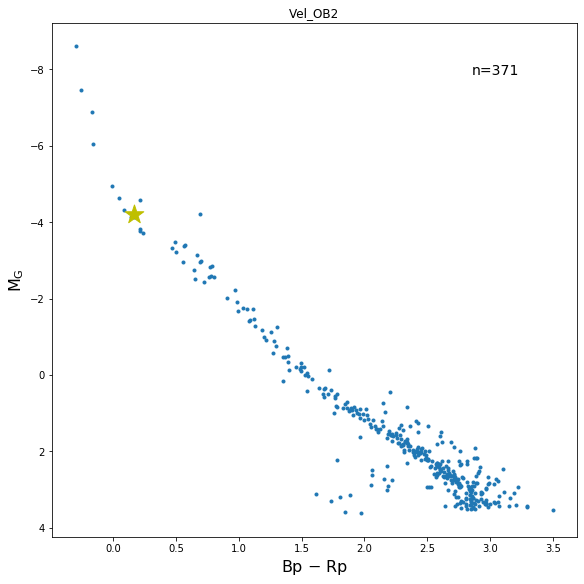

Error in callback <function flush_figures at 0x7ff3dd1ccb90> (for post_execute):


KeyboardInterrupt: 

In [108]:
from chronos import Cluster
from chronos.plot import plot_hrd
from chronos.plot import plot_rdp_pmrv

for row in short_list[['source_id','Cluster']].values:
    gaiaid,cluster_name = row
    t = Target(gaiaDR2id=gaiaid)   
    d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
    c = Cluster(cluster_name=cluster_name)
    df_mem = c.query_cluster_members()
    

    #HR diagram
    fig = plot_hrd(df=df_mem, target_gaia_id=t.gaiaid, match_id=True, df_target=t.gaia_params);
    fig.axes[0].set_title(cluster_name)
    fig.savefig(f'{t.gaiaid}_{cluster_name}_hrd.png')
    
    df_gaia_mem = c.query_cluster_members_gaia_params(gmag_cut=None, clobber=False)
    fig = plot_rdp_pmrv(df=df_gaia_mem, target_gaia_id=t.gaiaid, match_id=False, df_target=t.gaia_params);
    # fig.suptitle(t.nearest_cluster_name)
    fig.suptitle(cluster_name)
    fig.savefig(f'{t.gaiaid}_{cluster_name}_xyz.png')